In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,1
allowing,1
ff,1
dry,1


In [5]:
X = df.iloc[:,1:3001]  # word frequency features
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,1,1,0,0,0,6,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,2,2,2,1,5,1,24,2,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,10,9,3,2,3,3,38,3,0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
169,1,0,1,0,0,1,23,0,0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Y = df.iloc[:,-1].values # 1 = spam, 0 = not spam
Y

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1., nan])

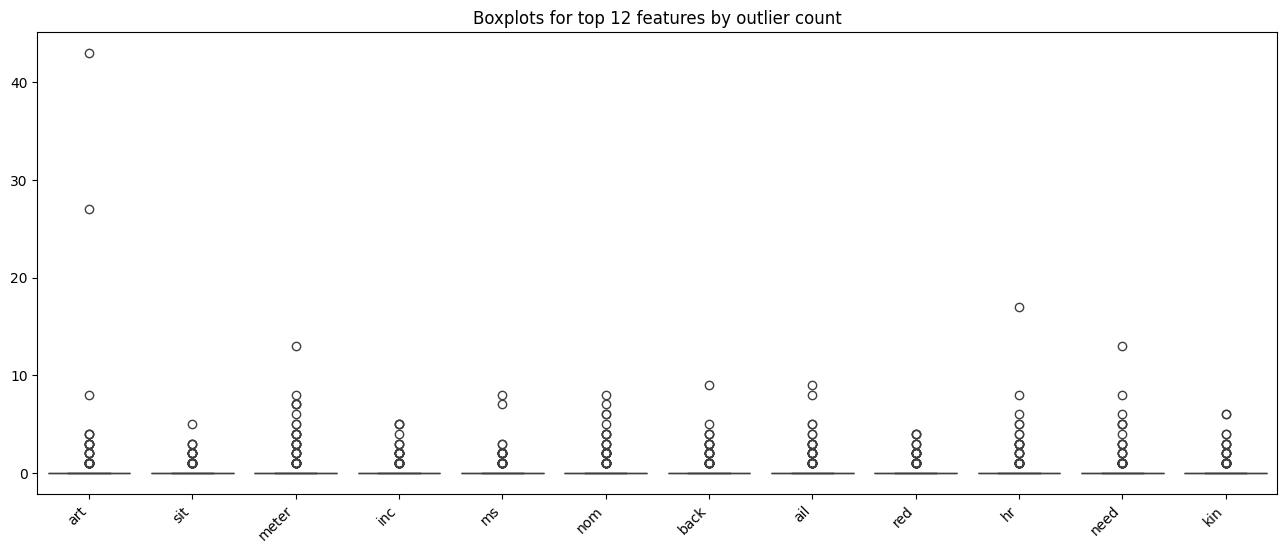

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric = df[numeric_cols]
# Visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns

# compute IQR outlier counts (you already had this)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_mask = ((df_numeric < lower) | (df_numeric > upper))
outlier_counts = outlier_mask.sum().sort_values(ascending=False)

# pick top N features
topN = 12
top_features = outlier_counts.head(topN).index.tolist()

plt.figure(figsize=(16,6))
sns.boxplot(data=df_numeric[top_features])
plt.title(f"Boxplots for top {topN} features by outlier count")
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
import numpy as np

# Identify rows with NaNs in X
nan_in_X = X.isnull().any(axis=1)

# Identify rows with NaNs in Y (convert to Series for isnull() then to numpy array)
nan_in_Y = pd.Series(Y).isnull().to_numpy()

# Combine masks to find rows that have NaN in either X or Y
combined_nan_mask = nan_in_X | nan_in_Y

# Create cleaned versions of X and Y by dropping rows with NaNs
X_clean = X[~combined_nan_mask]
Y_clean = Y[~combined_nan_mask]

print(f"Original shape of X: {X.shape}")
print(f"Cleaned shape of X: {X_clean.shape}")
print(f"Original shape of Y: {Y.shape}")
print(f"Cleaned shape of Y: {Y_clean.shape}")

# Split data using the cleaned versions
X_train, X_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.25, random_state=42)

Original shape of X: (171, 3000)
Cleaned shape of X: (170, 3000)
Original shape of Y: (171,)
Cleaned shape of Y: (170,)


In [11]:
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# -------- Support Vector Machine --------
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [13]:
import numpy as np

# Identify rows with NaNs in X
nan_in_X = X.isnull().any(axis=1)

# Identify rows with NaNs in Y (convert to Series for isnull() then to numpy array)
nan_in_Y = pd.Series(Y).isnull().to_numpy()

# Combine masks to find rows that have NaN in either X or Y
combined_nan_mask = nan_in_X | nan_in_Y

# Remove rows with NaNs from both X and Y by reassigning X and Y
original_X_shape = X.shape
original_Y_shape = Y.shape
X = X[~combined_nan_mask]
Y = Y[~combined_nan_mask]

print(f"Original shape of X: {original_X_shape}")
print(f"Cleaned shape of X: {X.shape}")
print(f"Original shape of Y: {original_Y_shape}")
print(f"Cleaned shape of Y: {Y.shape}")

Original shape of X: (171, 3000)
Cleaned shape of X: (170, 3000)
Original shape of Y: (171,)
Cleaned shape of Y: (170,)


In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.25, random_state=42)

In [15]:
print("SVM Accuracy:", accuracy_score(y_test, svc_pred))
print("SVM Classification Report:\n", classification_report(y_test, svc_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))

SVM Accuracy: 0.8372093023255814
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        33
         1.0       1.00      0.30      0.46        10

    accuracy                           0.84        43
   macro avg       0.91      0.65      0.68        43
weighted avg       0.87      0.84      0.80        43

SVM Confusion Matrix:
 [[33  0]
 [ 7  3]]


In [16]:
# -------- K-Nearest Neighbors --------
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [17]:
print("KNN Accuracy:", knn.score(X_test, y_test))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

KNN Accuracy: 0.8604651162790697
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        33
         1.0       0.75      0.60      0.67        10

    accuracy                           0.86        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.85      0.86      0.85        43

KNN Confusion Matrix:
 [[31  2]
 [ 4  6]]


In [18]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

ks = [1, 3, 5]

results = {}
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_s, y_train)              # X_train_s must be scaled features
    y_pred = knn.predict(X_test_s)          # X_test_s must be scaled features

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    results[k] = acc

    print(f"\nK = {k}:")
    print(f"  Accuracy = {acc:.4f}")
    print("  Confusion Matrix:")
    print(cm)
    print("  Classification Report:")
    print(report)



K = 1:
  Accuracy = 0.6279
  Confusion Matrix:
[[17 16]
 [ 0 10]]
  Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68        33
         1.0       0.38      1.00      0.56        10

    accuracy                           0.63        43
   macro avg       0.69      0.76      0.62        43
weighted avg       0.86      0.63      0.65        43


K = 3:
  Accuracy = 0.4419
  Confusion Matrix:
[[ 9 24]
 [ 0 10]]
  Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43        33
         1.0       0.29      1.00      0.45        10

    accuracy                           0.44        43
   macro avg       0.65      0.64      0.44        43
weighted avg       0.84      0.44      0.43        43


K = 5:
  Accuracy = 0.4186
  Confusion Matrix:
[[ 8 25]
 [ 0 10]]
  Classification Report:
              precision    recall  f1-score   support

         0.0   